In [1]:
import numpy as np
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from keras.models import Model, Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras import backend as K

np.random.seed(1)

Using TensorFlow backend.


In [3]:
img = (512,512,3)
img

(512, 512, 3)

In [7]:
print(x_train.shape, y_train.shape)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(22046, 200, 200, 3) (22046, 2)
(2756, 200, 200, 3) (2756, 200, 200, 3) (2756, 2) (2756, 2)


In [4]:
IMAGE_SIZE = 512
IMAGE_SIZE

512

In [7]:
def vgg_2D():
    base_model = VGG16(weights='imagenet',include_top=False,pooling='avg',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    base_model.trainable = False
    X = base_model.output
    X.trainable = False
    
    X = Dense(1024, activation='relu')(X)
    X = Dropout(0.5)(X)
    predictions = Dense(2, activation='softmax', trainable=True)(X)
    
    for layer in base_model.layers[:]:
        layer.trainable=False
    
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = None
model=vgg_2D()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 512, 512, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0         
__________

In [11]:
# check input
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(22046, 200, 200, 3) (22046, 2) (2756, 200, 200, 3) (2756, 2) (2756, 200, 200, 3) (2756, 2)


In [12]:
from keras.preprocessing.image import ImageDataGenerator

model=get_model_exp2_b()
path_model='vgg_sterioid.h5' 


# set the learning rate
K.set_value(model.optimizer.lr, 0.01) 


datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=35,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range = 20,
    horizontal_flip=True)

datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 64, 
                    epochs=100, 
                    verbose=1, 
                    validation_data=(x_val,y_val),
                    callbacks=[
                       ModelCheckpoint(filepath=path_model, monitor='val_acc',  save_best_only=False),
                    ]      
                   )

Epoch 1/100
345/344 [==============================] - 342s 990ms/step - loss: 0.2719 - acc: 0.9018 - precision: 0.9318 - recall: 0.8704 - f1: 0.8982 - matthews_correlation: 0.8061 - auc: 0.9152 - val_loss: 0.1366 - val_acc: 0.9528 - val_precision: 0.9568 - val_recall: 0.9477 - val_f1: 0.9505 - val_matthews_correlation: 0.9053 - val_auc: 0.9578
Epoch 2/100
345/344 [==============================] - 330s 956ms/step - loss: 0.1875 - acc: 0.9341 - precision: 0.9608 - recall: 0.9053 - f1: 0.9312 - matthews_correlation: 0.8696 - auc: 0.9652 - val_loss: 0.1139 - val_acc: 0.9568 - val_precision: 0.9700 - val_recall: 0.9423 - val_f1: 0.9544 - val_matthews_correlation: 0.9130 - val_auc: 0.9696
Epoch 3/100
345/344 [==============================] - 328s 952ms/step - loss: 0.1735 - acc: 0.9365 - precision: 0.9615 - recall: 0.9093 - f1: 0.9336 - matthews_correlation: 0.8741 - auc: 0.9723 - val_loss: 0.1150 - val_acc: 0.9568 - val_precision: 0.9781 - val_recall: 0.9355 - val_f1: 0.9546 - val_matthe

In [14]:
 def plot_loss_accu(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'g')
    plt.plot(epochs, val_loss, 'y')
    plt.title('Loss')
    plt.legend(['train', 'val'], loc='upper right')
    plt.grid(True)
    plt.savefig('vgg2b_loss.jpg', dpi=300)
    plt.show()
    
def plot_loss(history):
    loss = history.history['acc']
    val_loss = history.history['val_acc']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')
    plt.grid(True)
    plt.savefig('vgg2b_acc.jpg', dpi=300)
    plt.show()

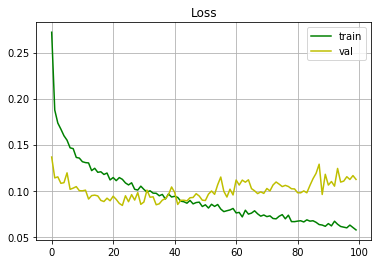

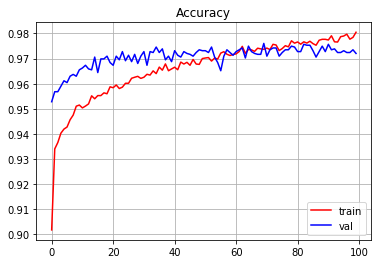

Done!


In [15]:
plot_loss_accu(model.history)
plot_loss(model.history)
print("Done!")

In [8]:
#score = model.evaluate(x_test, y_test, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

In [9]:
#y_pred = model.predict(x_test)
# get labels from predictions
#pred_labels = np.array([np.argmax(pred) for pred in y_pred])
#convert ground truths to column values
#y_test = np.argmax(y_test, axis=1)
#accuracy = np.mean((y_test==pred_labels))